In [1]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X.shape

(60000, 28, 28)

In [3]:
y = to_categorical(y)
y_test = to_categorical(y_test)

In [4]:
# hidden layer를 쌓는 과정
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))   
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [5]:
# preprocessing
X = X.reshape((60000, 28*28))
X = X/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [6]:
X_val = X[:10000]
partial_X = X[10000:]

y_val = y[:10000]
partial_y = y[10000:]

In [7]:
val= net.fit(partial_X,partial_y,epochs=25, batch_size=128,validation_data=(X_val, y_val))

Epoch 1/25
391/391 [==============================] - 7s 17ms/step - loss: 0.5190 - acc: 0.8103 - val_loss: 0.3755 - val_acc: 0.8591
Epoch 2/25
391/391 [==============================] - 6s 15ms/step - loss: 0.3645 - acc: 0.8669 - val_loss: 0.3636 - val_acc: 0.8652
Epoch 3/25
391/391 [==============================] - 6s 16ms/step - loss: 0.3175 - acc: 0.8830 - val_loss: 0.3371 - val_acc: 0.8801
Epoch 4/25
391/391 [==============================] - 6s 15ms/step - loss: 0.2877 - acc: 0.8928 - val_loss: 0.3131 - val_acc: 0.8850
Epoch 5/25
391/391 [==============================] - 6s 14ms/step - loss: 0.2694 - acc: 0.8974 - val_loss: 0.3037 - val_acc: 0.8892
Epoch 6/25
391/391 [==============================] - 5s 14ms/step - loss: 0.2517 - acc: 0.9053 - val_loss: 0.3751 - val_acc: 0.8658
Epoch 7/25
391/391 [==============================] - 5s 14ms/step - loss: 0.2357 - acc: 0.9108 - val_loss: 0.3112 - val_acc: 0.8862
Epoch 8/25
391/391 [==============================] - 5s 14ms/step - 

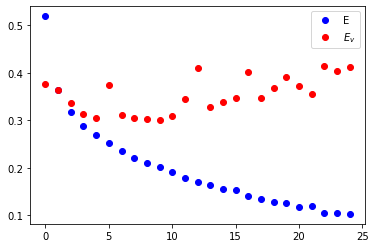

In [8]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

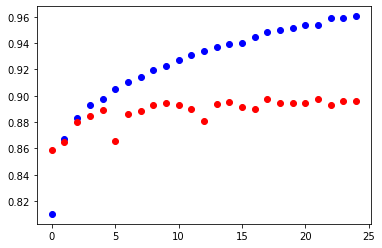

In [9]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [10]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


0.8883 정도의 정확도로 분류할 수 있다.

In [11]:
test_loss, test_acc = net.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4962 - acc: 0.8883
